# Исследование надёжности заёмщиков
____

### В данном исследовании анализируется влияние семейного положения, количества детей, уровня доходов клиента и целей взятия кредита на возврат кредита в срок.
____

### Исследование разделено на несколько частей.

#### [Часть 1. Подготовка к исследованию и изучение общей информации:](#1)

* [1. Импорт библиотек.](#1.1)
* [2. Получение и изучение общей информации о данных.](#1.2)

#### [Часть 2. Подготовка данных:](#2)

* [1. Обработка пропусков.](#2.1)
* [2. Обработка дубликатов.](#2.2)
* [3. Приведение данных к нужным типам.](#2.3)
* [4. Нахождение и исправление аномалий и ошибок.](#2.4)
* [5. Категоризация.](#2.5)

#### [Часть 3. Анализ данных:](#3)

* [0. Функции, используемые для анализа данных](#3.0)
* [1. Изучение зависимости между наличием детей и возвратом кредита в срок.](#3.1)
* [2. Изучение зависимости между семейным положением и возвратом кредита в срок.](#3.2)
* [3. Изучение зависимости между уровнем дохода и возвратом кредита в срок.](#3.3)
* [4. Изучение зависимости между целью взятия кредита и возвратом кредита в срок.](#3.4)

#### [Часть 4. Общий вывод](#4)

### Часть 1. Изучение общей информации <a id='1'></a>

#### 1.1 Импорт библиотек <a id='1.1'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1.2 Получение и изучение общей информации о данных. <a id='1.2'></a>

In [2]:
clients_data = pd.read_csv('/datasets/data.csv')
clients_data.info()

display(clients_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


#### Вывод

Столбец 'days_employed' заполнен неверными данными. Скорее всего произошла какая-то техническая ошибка. В столбцах 'days_employed' и 'total_income' одинаковое количество пропусков. Остальные столбцы заполнены полностью.

### Часть 2. Подготовка данных <a id='2'></a>

#### 2.1 Обработка пропусков <a id='2.1'></a>

##### Проверим есть ли зависимость между пропусками в различных столбцах

Пропуски есть только в столбцах 'days_employed' и 'total_income'. Причем их количество одинаковое. Стоит проверить, не у одних и тех же ли клиентов отсутствуют эти даннные.

In [3]:
clients_without_income = clients_data[clients_data['total_income'].isna()]
clients_without_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 12 to 21510
Data columns (total 12 columns):
children            2174 non-null int64
days_employed       0 non-null float64
dob_years           2174 non-null int64
education           2174 non-null object
education_id        2174 non-null int64
family_status       2174 non-null object
family_status_id    2174 non-null int64
gender              2174 non-null object
income_type         2174 non-null object
debt                2174 non-null int64
total_income        0 non-null float64
purpose             2174 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 220.8+ KB


##### Вывод

У некоторых клиентов незаполнены данные о доходе и трудовом стаже. Наверно они брали кредит, для оформления которого не нужно сообщать эти данные.

##### обработаем пропуски

В столбце 'days_employed' почти все данные точно не верны. К тому же информация, которую должен содержать этот столбец, нам не нужна для дальнейшего исследования. Значит мы можем просто удалить его.

In [4]:
clients_data = clients_data.drop(columns='days_employed')
display(clients_data.head())

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Пропуски остались только в столбце 'total_income'. Заполним их медианным доходом людей, того же типа занятости.

In [5]:
median_incomes = clients_data.groupby('income_type')['total_income'].median()

def income_filler(row):
    if pd.isna(row['total_income']):
        return median_incomes[row['income_type']]
    return row['total_income']

clients_data['total_income'] = clients_data.apply(income_filler, axis=1)
clients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 11 columns):
children            21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 1.8+ MB


#### 2.2 Обработка дубликатов <a id='2.2'></a>

In [6]:
print(clients_data.duplicated().sum())

54


В таблице есть строки, которые полностью совпадают. Это означает, что в них содержится информация об одном и том же клиенте, ведь совпадение дохода и всех категориальных переменных одновременно маловероятно. Значит повторяющиеся строки надо удалить.

In [7]:
clients_data = clients_data.drop_duplicates().reset_index(drop=True)
print(clients_data.duplicated().sum())

0


#### Вывод

Суммарно было 54 дубликата. Скорее всего данные были продублированы при заполнении таблицы.

#### 2.3. Приведение данных к нужным типам <a id='2.3'></a>

В столбце 'total_income' нам не нужна высокая точность доходов, поэтому в нем можно заменить тип данных с float64 на целочисленный.

In [8]:
clients_data['total_income'] = clients_data['total_income'].round()
clients_data['total_income'] = clients_data['total_income'].astype('int64')
display(clients_data.head())

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253876,покупка жилья
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145886,покупка жилья
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267629,дополнительное образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


#### 2.4 Нахождение и исправление аномалий и ошибок <a id='2.4'></a>

##### Проверка данных в столбце 'children'

In [9]:
display(clients_data['children'].value_counts())

 0     14107
 1      4809
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

В то, что детей может быть от 0 до 5 я поверить готов. В 20 уже сложнее. -1 -- совсем невозможно!

Скорее всего под -1 ребенком подразумевали одного ребенка, а минус появился из-за того, что тот, кто заполнял таблицу хотел поставить тире. Поэтому я заменю -1 на 1.

In [10]:
clients_data['children'] = clients_data['children'].replace(-1, 1)
print(clients_data['children'].value_counts())

0     14107
1      4856
2      2052
3       330
20       76
4        41
5         9
Name: children, dtype: int64


Давайте выведем данные о клиентах с 20 детьми.

In [11]:
display(clients_data[(clients_data['children'] == 20)].head())

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
606,20,21,среднее,1,женат / замужем,0,M,компаньон,0,145335,покупка жилья
720,20,44,среднее,1,женат / замужем,0,F,компаньон,0,112999,покупка недвижимости
1074,20,56,среднее,1,женат / замужем,0,F,сотрудник,1,229519,получение образования
2510,20,59,высшее,0,вдовец / вдова,2,F,сотрудник,0,264475,операции с коммерческой недвижимостью
2940,20,0,среднее,1,женат / замужем,0,F,сотрудник,0,199740,на покупку автомобиля


Судя по доходам, 20 детей не сможет потянуть ни один клиент. Но непонятно, что нам хотели донести этим числом? То, что у них двое детей? Или 0?

<a id='problem_of_20_children'></a>
Я заменю 20 на -1, чтобы показать, что данные ошибочны. При исследовании буду работать только с положительными значениями в данном столбце. 

In [12]:
clients_data['children'] = clients_data['children'].replace(20, -1)
display(clients_data['children'].value_counts())

 0    14107
 1     4856
 2     2052
 3      330
-1       76
 4       41
 5        9
Name: children, dtype: int64

##### Проверка данных в столбце 'education'

In [13]:
print(clients_data['education'].value_counts())

среднее                13705
высшее                  4710
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64


В столбце 'education' данные записаны в разном регистре. Этот столбец надо стандартизировать, приведя все строки в нижний регистр

In [14]:
clients_data['education'] = clients_data['education'].str.lower()
print(clients_data['education'].value_counts())

среднее                15188
высшее                  5251
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64


##### Проверка данных в столбце 'education_id'

In [15]:
print(clients_data['education_id'].value_counts())

1    15188
0     5251
2      744
3      282
4        6
Name: education_id, dtype: int64


##### Проверка данных в столбце 'family_status'

In [16]:
print(clients_data['family_status'].value_counts())

женат / замужем          12344
гражданский брак          4163
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64


##### Проверка данных в столбце 'family_status_id'

In [17]:
print(clients_data['family_status_id'].value_counts())

0    12344
1     4163
4     2810
3     1195
2      959
Name: family_status_id, dtype: int64


##### Проверка данных в столбце 'debt'

In [18]:
print(clients_data['debt'].value_counts())

0    19730
1     1741
Name: debt, dtype: int64


##### Проверка данных в столбце 'total_income'

In [19]:
print(clients_data['total_income'].min())
print(clients_data['total_income'].max())

20667
2265604


#### 2.5 Категоризация <a id='2.5'></a>

##### Создание словарей

В таблице есть пары столбцов, которые несут в себе одну и ту же информацию. Это:
- 'education' и 'education_id'
- 'family_status' и 'family_status_id'

Создадим словари из них, а столбцы 'education' и 'family_status' из общей таблицы удалим

In [20]:
education_dict = clients_data[['education', 'education_id']].copy().drop_duplicates().reset_index(drop=True).sort_values(by='education_id')
display(education_dict)

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


In [21]:
family_status_dict = clients_data[['family_status', 'family_status_id']].copy().drop_duplicates().reset_index(drop=True).sort_values(by='family_status_id')
display(family_status_dict)

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


In [22]:
clients_data = clients_data.drop(columns=['education', 'family_status'])
display(clients_data.head())

,children,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,0,0,F,сотрудник,0,253876,покупка жилья
1,1,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,33,1,0,M,сотрудник,0,145886,покупка жилья
3,3,32,1,0,M,сотрудник,0,267629,дополнительное образование
4,0,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


Также сделаем словарь, который будет говорить, что если в столбце 'debt' стоит 0, значит у клиента не было долгов, а если 1, то клиент должник

In [23]:
debt_dict = clients_data[['debt']]
debt_dict = debt_dict.drop_duplicates().reset_index(drop=True).sort_values(by='debt')

def define_debtor(debt):
    if (debt):
        return 'должник'
    return 'нет долгов'

debt_dict['is_debtor'] = debt_dict['debt'].copy().apply(define_debtor)
display(debt_dict)

,debt,is_debtor
0,0,нет долгов
1,1,должник


##### Лемматизация целей взятия кредита

Причины взятия кредитов написаны своими словами. Хочется их как-то стандартизировать. Для этого для начала проведем лемматизацию столбца 'purpose'.

In [24]:
from pymystem3 import Mystem
m = Mystem()

def my_lemmatize(str):
    return(''.join(m.lemmatize(str)))

purpose_list = clients_data['purpose'].apply(my_lemmatize)
display(purpose_list.unique())

array(['покупка жилье\n', 'приобретение автомобиль\n',
       'дополнительный образование\n', 'сыграть свадьба\n',
       'операция с жилье\n', 'образование\n', 'на проведение свадьба\n',
       'покупка жилье для семья\n', 'покупка недвижимость\n',
       'покупка коммерческий недвижимость\n',
       'покупка жилой недвижимость\n',
       'строительство собственный недвижимость\n', 'недвижимость\n',
       'строительство недвижимость\n',
       'на покупка подержать автомобиль\n',
       'на покупка свой автомобиль\n',
       'операция с коммерческий недвижимость\n',
       'строительство жилой недвижимость\n', 'жилье\n',
       'операция со свой недвижимость\n', 'автомобиль\n',
       'заниматься образование\n', 'сделка с подержанный автомобиль\n',
       'получение образование\n', 'свадьба\n',
       'получение дополнительный образование\n', 'покупка свой жилье\n',
       'операция с недвижимость\n', 'получение высокий образование\n',
       'свой автомобиль\n', 'сделка с автомобиль

##### Вывод

Клиенты берут кредит на 4 цели:
- покупка/ремонт недвижимости
- получение образования
- покупка автомобиля
- организация свадьбы

##### категоризация по целям взятия кредита

Мы выяснили, что есть всего 4 цели, на которые берут кредит. Значит стоит создать столбец, в котором будет написана одна из этих четырех целей.

In [25]:
def identify_purpose(client_purpose):
    lemmas = m.lemmatize(client_purpose)
    if 'образование' in lemmas:
        return 'получение образования'
    if 'жилье' in lemmas or 'недвижимость' in lemmas:
        return 'покупка/ремонт недвижимости'
    if 'автомобиль' in lemmas:
        return 'покупка автомобиля'
    if 'свадьба' in lemmas:
        return 'организация свадьбы'
    print('error')
    return ''

clients_data['standardized_purpose'] = clients_data['purpose'].apply(identify_purpose)
display(clients_data.head())

,children,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,standardized_purpose
0,1,42,0,0,F,сотрудник,0,253876,покупка жилья,покупка/ремонт недвижимости
1,1,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,покупка автомобиля
2,0,33,1,0,M,сотрудник,0,145886,покупка жилья,покупка/ремонт недвижимости
3,3,32,1,0,M,сотрудник,0,267629,дополнительное образование,получение образования
4,0,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,организация свадьбы


Функция выводит сообщение об ошибке, если окажется, что я не заметил какую-нибудь цель.

##### категоризация по количеству детей

Клиентов с 4 и 5 детьми очень мало для объективного исследования. Поэтому я распределю клиентов на 4 категории:
- бездетные
- с одним ребенком
- с двумя детьми
- многодетные
<a id='children_status_error'></a>

Также добавлю категорию 'error' для тех клиентов, [чье количество детей установить не удалось.](#problem_of_20_children)

In [26]:
def children_identify(children):
    if children == -1:
        return 'error'
    if children == 0:
        return 'бездетный'
    if children == 1:
        return 'с одним ребенком'
    if children == 2:
        return 'с двумя детьми'
    return 'многодетный'

clients_data['children_status'] = clients_data['children'].apply(children_identify)
display(clients_data.head())

,children,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,standardized_purpose,children_status
0,1,42,0,0,F,сотрудник,0,253876,покупка жилья,покупка/ремонт недвижимости,с одним ребенком
1,1,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,покупка автомобиля,с одним ребенком
2,0,33,1,0,M,сотрудник,0,145886,покупка жилья,покупка/ремонт недвижимости,бездетный
3,3,32,1,0,M,сотрудник,0,267629,дополнительное образование,получение образования,многодетный
4,0,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,организация свадьбы,бездетный


##### категоризация по доходу

Надо разделить клиентов на группы по уровню дохода. Средний класс начинается с медианного значения. Узнаем его:

In [27]:
medium_class_lower_bound = clients_data['total_income'].median()
display(medium_class_lower_bound)

142594.0

Посмотрим на гистограмму, чтобы понять где заканчивается средний класс:

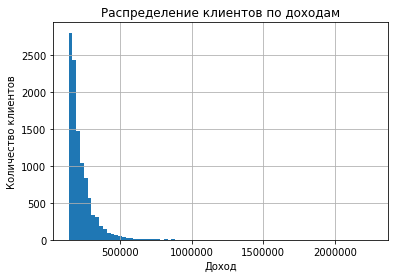

In [29]:
patches = clients_data[clients_data['total_income'] > medium_class_lower_bound].hist(column='total_income', bins = 80)
plt.xlabel('Доход')
plt.ylabel('Количество клиентов')
plt.title('Распределение клиентов по доходам')
plt.show()

Судя по гистограмме средний класс заканчивается в районе 300 тыс. Распределим клиентов на классы по полученным границам

In [30]:
def define_income_category(income):
    if income <= medium_class_lower_bound:
        return 'бедные'
    if income < 300000:
        return 'средний класс'
    return 'богатые'

clients_data['income_category'] = clients_data['total_income'].apply(define_income_category)
display(clients_data['income_category'].value_counts())

бедные           10858
средний класс     9130
богатые           1483
Name: income_category, dtype: int64

### Часть 3.  Анализ данных <a id='3'></a> 

#### 3.0. Функции, используемые для анализа данных <a id='3.0'></a> 

##### 3.0.1 Функция для создания итоговой таблицы <a id='3.0.1'></a>

In [31]:
def result_data(data, arg_for_grouping):
    result = data.pivot_table(index=arg_for_grouping, columns='is_debtor', values='debt', aggfunc='count')
    result['доля должников'] = result['должник'] / (result['должник'] + result['нет долгов'])
    result = result.sort_values(by='доля должников')
    return result

#### 3.1. Изучение зависимости между наличием детей и возвратом кредита в срок <a id='3.1'></a>

Для исследования нам нужны 2 столбца: 'debt' и 'children_status'. Я выделю их в отдельную таблицу, забыв о клиентах, у которых ['error' в 'children_status'](#children_status_error)

In [32]:
debt_and_children = clients_data[clients_data['children_status'] != 'error'][['debt', 'children_status']].copy()
display(debt_and_children.head())

,debt,children_status
0,0,с одним ребенком
1,0,с одним ребенком
2,0,бездетный
3,0,многодетный
4,0,бездетный


Добавим столбец, в котором будет написано, является ли клиент должником для построения итоговой таблицы.

In [33]:
debt_and_children = debt_and_children.merge(debt_dict, on='debt', how='left')
display(debt_and_children.head())

,debt,children_status,is_debtor
0,0,с одним ребенком,нет долгов
1,0,с одним ребенком,нет долгов
2,0,бездетный,нет долгов
3,0,многодетный,нет долгов
4,0,бездетный,нет долгов


Теперь для каждой группы посчитаем процент людей, имевших задолженность. <a id='summary_table_1'></a>

In [34]:
debt_from_children = result_data(debt_and_children, 'children_status')
display(debt_from_children)

is_debtor,должник,нет долгов,доля должников
children_status,,,
бездетный,1063,13044,0.075353
многодетный,31,349,0.081579
с одним ребенком,445,4411,0.091639
с двумя детьми,194,1858,0.094542


#### Вывод

- Меньше всего должников среди бездетных. Им не надо тратиться на детей, поэтому остается больше денег и, соответственно, больше возможностей для погашения кредита.
- Результат, полученный у многодетных ненамного выше результата бездетных. Обычно, стать многодетным родителем - осознанный шаг. Люди, прежде чем пойти на него, часто обдумывают свое финансовое положение. Поэтому и возвращают кредиты вовремя.
- У клиентов с одним и двумя детьми схожий и довольно высокий процент появления задолженности. Люди часто не продумывают что будет после рождения ребенка. А содержание каждого ребенка требует большого количества денег.

#### 3.2 Изучение зависимости между семейным положением и возвратом кредита в срок <a id='3.2'></a>

Для ответа на этот вопрос нам нужны столбцы 'debt' и 'family_status_id'

In [35]:
debt_and_family_status = clients_data[['debt', 'family_status_id']]
display(debt_and_family_status.head())

,debt,family_status_id
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


Добавим столбец, в котором будет написано, является ли клиент должником для построения итоговой таблицы.

In [36]:
debt_and_family_status = debt_and_family_status.merge(debt_dict, on='debt', how='left')
display(debt_and_family_status.head())

,debt,family_status_id,is_debtor
0,0,0,нет долгов
1,0,0,нет долгов
2,0,0,нет долгов
3,0,0,нет долгов
4,0,1,нет долгов


Прикрепим к таблице, с которой мы работаем словарь семейного статуса для формирования итоговой таблицы

In [37]:
debt_and_family_status = debt_and_family_status.merge(family_status_dict, on='family_status_id', how='left')
display(debt_and_family_status.head())

,debt,family_status_id,is_debtor,family_status
0,0,0,нет долгов,женат / замужем
1,0,0,нет долгов,женат / замужем
2,0,0,нет долгов,женат / замужем
3,0,0,нет долгов,женат / замужем
4,0,1,нет долгов,гражданский брак


Теперь для каждой группы посчитаем процент людей, имевших задолженность. <a id='summary_table_2'></a>

In [38]:
debt_from_family_status = result_data(debt_and_family_status, 'family_status')
display(debt_from_family_status)

is_debtor,должник,нет долгов,доля должников
family_status,,,
вдовец / вдова,63,896,0.065693
в разводе,85,1110,0.071130
женат / замужем,931,11413,0.075421
гражданский брак,388,3775,0.093202
Не женат / не замужем,274,2536,0.097509


#### Вывод

- Чаще всех кредит не возвращают в срок клиенты, не состоящие в браке. Они реже планируют свое будущее, особенно с финансовой точки зрения, а потому возрастает вероятность того, что они могут остаться без денег.
- Доля должников среди клиентов, состоящих в гражданском браке чуть ниже. У этих людей есть рядом человек, который может отговорить от взятия кредита, если понятно, что его будет тяжело выплатить.
- Значительно меньше доля должников среди клинтов, состоящих в браке. У людей, состоящих в браке, общий с партнером бюджет, что заставляет принимать более взвешенные решения.
- Меньше всех доля должников среди разведенных и вдов/вдовцов. Они уже научились следить за финансами после брака, а жить в одиночку, с финансовой точки зрения, проще. Среди разведенных доля должников чуть выше. Видимо из-за того, что в разводе имущество делится.

#### 3.3 Изучение зависимости между уровнем дохода и возвратом кредита в срок <a id='3.3'></a>

Для ответа на этот вопрос нам понадобятся столбцы 'debt' и 'income_category'

In [39]:
debt_and_income = clients_data[['debt', 'income_category']].copy()
display(debt_and_income.head())

,debt,income_category
0,0,средний класс
1,0,бедные
2,0,средний класс
3,0,средний класс
4,0,средний класс


Добавим столбец, в котором будет написано, является ли клиент должником для построения итоговой таблицы.

In [40]:
debt_and_income = debt_and_income.merge(debt_dict, on='debt', how='left')
display(debt_and_income.head())

,debt,income_category,is_debtor
0,0,средний класс,нет долгов
1,0,бедные,нет долгов
2,0,средний класс,нет долгов
3,0,средний класс,нет долгов
4,0,средний класс,нет долгов


Теперь для каждой группы посчитаем процент людей, имевших задолженность. <a id='summary_table_3'></a>

In [41]:
debt_from_income = result_data(debt_and_income, 'income_category')
display(debt_from_income)

is_debtor,должник,нет долгов,доля должников
income_category,,,
богатые,106,1377,0.071477
средний класс,725,8405,0.079409
бедные,910,9948,0.083809


#### Вывод

Кажется, что результаты ожидаемы: чем богаче человек, тем меньше вероятность того, что он станет должником. Но разрыв между богатыми и бедными не так уж и велик (всего 1.2%, это меньше, чем между женатыми и состоящими в гражданском браке). Это объясняется тем, что богатые берут кредит на более высокие суммы, чем бедные, а потому выплачивать надо значительно больше.

#### 3.4. Изучение зависимости между целью взятия кредита и возвратом кредита в срок <a id='3.4'></a>

Для получения ответа на данный вопрос нам нужно 2 столбца: 'debt' и 'standardized_purpose'.

In [42]:
debt_and_purpose = clients_data[['debt', 'standardized_purpose']].copy()
display(debt_and_purpose.head())

,debt,standardized_purpose
0,0,покупка/ремонт недвижимости
1,0,покупка автомобиля
2,0,покупка/ремонт недвижимости
3,0,получение образования
4,0,организация свадьбы


Добавим столбец, в котором будет написано, является ли клиент должником для построения итоговой таблицы.

In [43]:
debt_and_purpose = debt_and_purpose.merge(debt_dict, on='debt', how='left')
display(debt_and_purpose.head())

,debt,standardized_purpose,is_debtor
0,0,покупка/ремонт недвижимости,нет долгов
1,0,покупка автомобиля,нет долгов
2,0,покупка/ремонт недвижимости,нет долгов
3,0,получение образования,нет долгов
4,0,организация свадьбы,нет долгов


Теперь для каждой группы посчитаем процент людей, имевших задолженность.<a id='summary_table_4'></a>

In [44]:
debt_from_purpose = result_data(debt_and_purpose, 'standardized_purpose')
display(debt_from_purpose)

is_debtor,должник,нет долгов,доля должников
standardized_purpose,,,
покупка/ремонт недвижимости,782,10032,0.072314
организация свадьбы,186,2149,0.079657
получение образования,370,3644,0.092177
покупка автомобиля,403,3905,0.093547


### Вывод

- Меньше всего должников среди клиентов, которые берут кредит на покупку/ремонт недвижимости. Некоторые делают это в коммерческих целях, а потому их доход увеличивается и они могут спокойно выплачивать кредит. А многие берут квартиру в ипотеку и, благодаря низкой процентной ставке, не становятся должниками.
- Относительно немного должников и среди тех, кто берет кредит на организацию свадьбы. Это связано с тем, что свадьба обходится не так уж и дорого, особенно если она оплачивается в кредит

Примерно равные показатели у целей получение образования и покупка автомобилей. Но я думаю совершенно разные причины:
- Совмещать работу и образование довольно трудно, поэтому доход клиента может упасть. К тому же само образование стоит довольно дорого.
- Люди хотят выделяться в своем окружении, поэтому покупают автомобили, значительно более высокого класса, чем позволяют доходы. Поэтому довольно часто они становятся должниками.

### 4. Общий вывод <a id='4'></a>

* Я удалил дубликаты в исходных данных, заполнил пропуски в доходах клиентов медианным доходом среди клиентов того же типа деятельности и исправил данные в столбцах 'children' и 'education'.
* Я распределил клиентов на 4 группы по целям взятия кредита, на 4 группы по количеству детей и на 3 группы по доходу
* Для каждой группы клиентов я посчитал процент должников:
    - [таблица зависимости количества должников от количества детей](#summary_table_1)
    - [таблица зависимости количества должников от семейного положения](#summary_table_2)
    - [таблица зависимости количества должников от дохода](#summary_table_3)
    - [таблица зависимости количества должников от целей получения кредита](#summary_table_4)

В результате исследования, я пришел к следующим выводам:

- Бездетные и многодетные редко становятся должниками. Первые потому, что им меньше надо тратить, а вторые потому, что подходят к финансовым вопросам более осознанно. Родители одного или двух детей часто становятся должниками, потому что содержание ребенка требует внушительных средств
- Клиенты, которые были в браке значительно реже становятся должниками, чем те, которые не были. Видимо, жизнь в браке учит рассчитывать свои финансы наперед.
- Богатые берут в кредит более значительные суммы и поэтому тоже часто становятся должниками. Однако все же реже, чем бедняки, благодаря некоторой финансовой подушкой безопасности
- Чаще должниками становятся клиенты цели которых приобретение автомобиля и получение образования. Первые покупают автомобиль, несоразмерный своим доходам, а вторым тяжело совмещать работу и образование.